<b><h1>SMS Spam Collection Data Set</h1></b>
<p><h2>Dataset information</h2>

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.

<b><h3>STEP-1: Loading Data</h3></b>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<b><h3>STEP-2: Performing Exploratory Data Analysis</h3></b>

In [5]:
#performing exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [54]:
df.shape

(5572, 7)

In [6]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


From above it can be observed that most the target is of ham category.
<p>It can also be observed that there are 5169 unique message out of total 5572 messages.

In [9]:
df.target.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: target, dtype: float64

From above we can notice that 13.4% of the given data is **spam**.

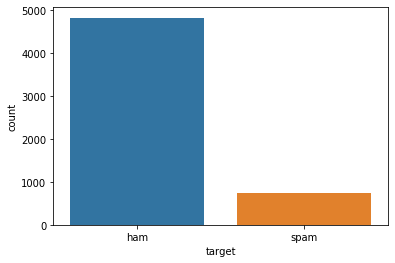

In [10]:
sns.countplot(x='target',data=df)

<b><h3>STEP-3: Preprocess the Data</h3></b>

In [30]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Devendra
[nltk_data]     Solanki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Devendra
[nltk_data]     Solanki\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [24]:
stemmer = PorterStemmer()
# # We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()
# initializing the lists

clean_lst = []

len_lst = []

In [25]:
def preprocess(raw_data, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_data)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_lst.append(" ".join(words))
    
    len_lst.append(len(words))

In [26]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [35]:
clean_lst = []

len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_stem'] = clean_lst

df['stem_length'] = len_lst



  0%|                                                                                         | 0/5572 [00:00<?, ?it/s]

  0%|                                                                                 | 1/5572 [00:00<17:55,  5.18it/s]

  0%|                                                                                 | 6/5572 [00:00<13:07,  7.07it/s]

  0%|▏                                                                                | 9/5572 [00:00<10:16,  9.03it/s]

  0%|▏                                                                               | 14/5572 [00:00<07:50, 11.81it/s]

  0%|▏                                                                               | 17/5572 [00:00<06:32, 14.16it/s]

  0%|▎                                                                               | 25/5572 [00:00<04:55, 18.76it/s]

  1%|▍                                                                               | 30/5572 [00:00<04:16, 21.58it/s]

  1%|▍                        

  7%|█████▏                                                                         | 369/5572 [00:08<01:40, 51.69it/s]

  7%|█████▎                                                                         | 375/5572 [00:08<02:12, 39.23it/s]

  7%|█████▍                                                                         | 380/5572 [00:08<02:19, 37.25it/s]

  7%|█████▍                                                                         | 385/5572 [00:09<02:28, 34.85it/s]

  7%|█████▌                                                                         | 391/5572 [00:09<02:09, 39.87it/s]

  7%|█████▋                                                                         | 398/5572 [00:09<01:57, 44.22it/s]

  7%|█████▋                                                                         | 403/5572 [00:09<02:23, 36.07it/s]

  7%|█████▊                                                                         | 410/5572 [00:09<02:02, 41.98it/s]

  8%|█████▉                     

 15%|███████████▋                                                                   | 823/5572 [00:16<01:15, 62.58it/s]

 15%|███████████▊                                                                   | 831/5572 [00:16<01:13, 64.36it/s]

 15%|███████████▉                                                                   | 838/5572 [00:17<01:22, 57.45it/s]

 15%|███████████▉                                                                   | 845/5572 [00:17<01:39, 47.42it/s]

 15%|████████████                                                                   | 851/5572 [00:17<01:40, 47.19it/s]

 15%|████████████▏                                                                  | 858/5572 [00:17<01:40, 47.09it/s]

 16%|████████████▎                                                                  | 865/5572 [00:17<01:30, 52.21it/s]

 16%|████████████▎                                                                  | 871/5572 [00:17<01:31, 51.41it/s]

 16%|████████████▍              

 22%|█████████████████▌                                                            | 1253/5572 [00:24<01:20, 53.77it/s]

 23%|█████████████████▋                                                            | 1262/5572 [00:24<01:11, 60.30it/s]

 23%|█████████████████▊                                                            | 1269/5572 [00:25<01:15, 57.24it/s]

 23%|█████████████████▊                                                            | 1276/5572 [00:25<01:18, 54.46it/s]

 23%|█████████████████▉                                                            | 1283/5572 [00:25<01:13, 58.24it/s]

 23%|██████████████████                                                            | 1290/5572 [00:25<01:14, 57.75it/s]

 23%|██████████████████▏                                                           | 1298/5572 [00:25<01:08, 62.44it/s]

 23%|██████████████████▎                                                           | 1305/5572 [00:25<01:16, 56.06it/s]

 24%|██████████████████▍        

 29%|██████████████████████▉                                                       | 1635/5572 [00:34<04:35, 14.28it/s]

 29%|██████████████████████▉                                                       | 1637/5572 [00:34<04:12, 15.58it/s]

 29%|██████████████████████▉                                                       | 1639/5572 [00:35<04:21, 15.03it/s]

 29%|██████████████████████▉                                                       | 1642/5572 [00:35<03:45, 17.40it/s]

 30%|███████████████████████                                                       | 1648/5572 [00:35<02:58, 21.94it/s]

 30%|███████████████████████▏                                                      | 1652/5572 [00:35<03:35, 18.16it/s]

 30%|███████████████████████▏                                                      | 1655/5572 [00:35<04:55, 13.25it/s]

 30%|███████████████████████▏                                                      | 1658/5572 [00:36<04:48, 13.57it/s]

 30%|███████████████████████▏   

 34%|██████████████████████████▎                                                   | 1880/5572 [00:45<02:40, 23.00it/s]

 34%|██████████████████████████▍                                                   | 1887/5572 [00:45<02:08, 28.76it/s]

 34%|██████████████████████████▍                                                   | 1892/5572 [00:45<01:52, 32.83it/s]

 34%|██████████████████████████▌                                                   | 1898/5572 [00:45<01:38, 37.41it/s]

 34%|██████████████████████████▋                                                   | 1905/5572 [00:45<01:24, 43.21it/s]

 34%|██████████████████████████▊                                                   | 1911/5572 [00:46<01:21, 44.94it/s]

 34%|██████████████████████████▊                                                   | 1917/5572 [00:46<01:18, 46.78it/s]

 35%|██████████████████████████▉                                                   | 1923/5572 [00:46<01:21, 44.76it/s]

 35%|███████████████████████████

 39%|██████████████████████████████▋                                               | 2192/5572 [00:55<01:14, 45.47it/s]

 39%|██████████████████████████████▊                                               | 2198/5572 [00:55<01:10, 47.54it/s]

 40%|██████████████████████████████▉                                               | 2208/5572 [00:55<01:00, 55.52it/s]

 40%|███████████████████████████████                                               | 2215/5572 [00:56<01:00, 55.32it/s]

 40%|███████████████████████████████                                               | 2222/5572 [00:56<00:57, 58.08it/s]

 40%|███████████████████████████████▏                                              | 2229/5572 [00:56<00:59, 56.58it/s]

 40%|███████████████████████████████▎                                              | 2235/5572 [00:56<01:00, 55.40it/s]

 40%|███████████████████████████████▎                                              | 2241/5572 [00:56<01:07, 49.25it/s]

 40%|███████████████████████████

 48%|█████████████████████████████████████▎                                        | 2665/5572 [01:03<00:48, 60.30it/s]

 48%|█████████████████████████████████████▍                                        | 2672/5572 [01:04<00:50, 56.93it/s]

 48%|█████████████████████████████████████▌                                        | 2679/5572 [01:04<00:51, 55.97it/s]

 48%|█████████████████████████████████████▌                                        | 2685/5572 [01:04<01:06, 43.09it/s]

 48%|█████████████████████████████████████▋                                        | 2691/5572 [01:04<01:03, 45.36it/s]

 48%|█████████████████████████████████████▊                                        | 2697/5572 [01:04<01:01, 47.09it/s]

 49%|█████████████████████████████████████▊                                        | 2703/5572 [01:04<00:58, 49.26it/s]

 49%|█████████████████████████████████████▉                                        | 2709/5572 [01:04<00:58, 49.04it/s]

 49%|███████████████████████████

 56%|███████████████████████████████████████████▌                                  | 3110/5572 [01:11<00:37, 65.33it/s]

 56%|███████████████████████████████████████████▋                                  | 3117/5572 [01:12<00:48, 50.20it/s]

 56%|███████████████████████████████████████████▊                                  | 3126/5572 [01:12<00:42, 57.22it/s]

 56%|███████████████████████████████████████████▊                                  | 3134/5572 [01:12<00:40, 60.37it/s]

 56%|███████████████████████████████████████████▉                                  | 3141/5572 [01:12<00:40, 60.53it/s]

 56%|████████████████████████████████████████████                                  | 3148/5572 [01:12<00:39, 61.42it/s]

 57%|████████████████████████████████████████████▏                                 | 3155/5572 [01:12<00:40, 59.59it/s]

 57%|████████████████████████████████████████████▎                                 | 3164/5572 [01:12<00:36, 66.17it/s]

 57%|███████████████████████████

 64%|█████████████████████████████████████████████████▉                            | 3563/5572 [01:19<00:39, 50.66it/s]

 64%|█████████████████████████████████████████████████▉                            | 3569/5572 [01:20<00:40, 49.28it/s]

 64%|██████████████████████████████████████████████████                            | 3577/5572 [01:20<00:36, 55.17it/s]

 64%|██████████████████████████████████████████████████▏                           | 3583/5572 [01:20<00:36, 53.96it/s]

 64%|██████████████████████████████████████████████████▏                           | 3589/5572 [01:20<00:37, 52.67it/s]

 65%|██████████████████████████████████████████████████▎                           | 3596/5572 [01:20<00:34, 56.63it/s]

 65%|██████████████████████████████████████████████████▍                           | 3604/5572 [01:20<00:31, 61.92it/s]

 65%|██████████████████████████████████████████████████▌                           | 3612/5572 [01:20<00:29, 65.51it/s]

 65%|███████████████████████████

 73%|████████████████████████████████████████████████████████▌                     | 4044/5572 [01:27<00:22, 69.11it/s]

 73%|████████████████████████████████████████████████████████▊                     | 4054/5572 [01:27<00:20, 73.38it/s]

 73%|████████████████████████████████████████████████████████▉                     | 4063/5572 [01:28<00:22, 67.19it/s]

 73%|████████████████████████████████████████████████████████▉                     | 4071/5572 [01:28<00:23, 63.95it/s]

 73%|█████████████████████████████████████████████████████████                     | 4078/5572 [01:28<00:23, 64.11it/s]

 73%|█████████████████████████████████████████████████████████▏                    | 4085/5572 [01:28<00:24, 61.19it/s]

 73%|█████████████████████████████████████████████████████████▎                    | 4092/5572 [01:28<00:36, 40.44it/s]

 74%|█████████████████████████████████████████████████████████▎                    | 4098/5572 [01:28<00:36, 40.15it/s]

 74%|███████████████████████████

 80%|██████████████████████████████████████████████████████████████▊               | 4484/5572 [01:36<00:18, 59.75it/s]

 81%|██████████████████████████████████████████████████████████████▉               | 4492/5572 [01:36<00:17, 61.24it/s]

 81%|██████████████████████████████████████████████████████████████▉               | 4499/5572 [01:36<00:20, 51.58it/s]

 81%|███████████████████████████████████████████████████████████████▏              | 4510/5572 [01:36<00:17, 59.41it/s]

 81%|███████████████████████████████████████████████████████████████▎              | 4519/5572 [01:36<00:16, 63.69it/s]

 81%|███████████████████████████████████████████████████████████████▎              | 4527/5572 [01:36<00:16, 64.37it/s]

 81%|███████████████████████████████████████████████████████████████▍              | 4534/5572 [01:36<00:18, 57.10it/s]

 81%|███████████████████████████████████████████████████████████████▌              | 4541/5572 [01:37<00:17, 60.31it/s]

 82%|███████████████████████████

 89%|█████████████████████████████████████████████████████████████████████▏        | 4944/5572 [01:44<00:14, 42.54it/s]

 89%|█████████████████████████████████████████████████████████████████████▎        | 4949/5572 [01:44<00:14, 43.37it/s]

 89%|█████████████████████████████████████████████████████████████████████▎        | 4954/5572 [01:44<00:15, 39.78it/s]

 89%|█████████████████████████████████████████████████████████████████████▍        | 4959/5572 [01:44<00:15, 40.09it/s]

 89%|█████████████████████████████████████████████████████████████████████▌        | 4966/5572 [01:44<00:13, 45.80it/s]

 89%|█████████████████████████████████████████████████████████████████████▌        | 4971/5572 [01:44<00:14, 42.86it/s]

 89%|█████████████████████████████████████████████████████████████████████▋        | 4976/5572 [01:44<00:13, 43.44it/s]

 89%|█████████████████████████████████████████████████████████████████████▋        | 4981/5572 [01:45<00:13, 45.10it/s]

 89%|███████████████████████████

 97%|███████████████████████████████████████████████████████████████████████████▍  | 5386/5572 [01:52<00:03, 59.70it/s]

 97%|███████████████████████████████████████████████████████████████████████████▌  | 5395/5572 [01:52<00:02, 64.88it/s]

 97%|███████████████████████████████████████████████████████████████████████████▋  | 5404/5572 [01:52<00:02, 68.32it/s]

 97%|███████████████████████████████████████████████████████████████████████████▊  | 5412/5572 [01:52<00:02, 68.23it/s]

 97%|███████████████████████████████████████████████████████████████████████████▊  | 5420/5572 [01:52<00:02, 66.58it/s]

 97%|███████████████████████████████████████████████████████████████████████████▉  | 5428/5572 [01:52<00:02, 69.53it/s]

 98%|████████████████████████████████████████████████████████████████████████████  | 5436/5572 [01:52<00:01, 69.45it/s]

 98%|████████████████████████████████████████████████████████████████████████████▏ | 5444/5572 [01:52<00:02, 62.58it/s]

 98%|███████████████████████████

In [36]:
clean_lst = []

len_lst = []

df['message'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_lemma'] = clean_lst

df['lemma_length'] = len_lst



  0%|                                                                                         | 0/5572 [00:00<?, ?it/s]

  0%|                                                                                 | 1/5572 [00:00<10:29,  8.85it/s]

  0%|                                                                                 | 5/5572 [00:00<08:03, 11.50it/s]

  0%|▏                                                                               | 10/5572 [00:00<06:14, 14.84it/s]

  0%|▏                                                                               | 13/5572 [00:00<05:23, 17.16it/s]

  0%|▏                                                                               | 17/5572 [00:00<04:34, 20.26it/s]

  0%|▎                                                                               | 21/5572 [00:00<03:56, 23.44it/s]

  0%|▎                                                                               | 26/5572 [00:00<03:20, 27.63it/s]

  1%|▍                        

  6%|█████                                                                          | 359/5572 [00:09<01:37, 53.45it/s]

  7%|█████▏                                                                         | 365/5572 [00:10<01:46, 48.91it/s]

  7%|█████▎                                                                         | 372/5572 [00:10<01:37, 53.52it/s]

  7%|█████▎                                                                         | 378/5572 [00:10<01:36, 53.88it/s]

  7%|█████▍                                                                         | 384/5572 [00:10<01:42, 50.38it/s]

  7%|█████▌                                                                         | 391/5572 [00:10<01:34, 54.78it/s]

  7%|█████▋                                                                         | 399/5572 [00:10<01:29, 58.08it/s]

  7%|█████▊                                                                         | 406/5572 [00:10<01:40, 51.49it/s]

  7%|█████▊                     

 14%|███████████▎                                                                   | 801/5572 [00:18<01:32, 51.85it/s]

 14%|███████████▍                                                                   | 807/5572 [00:18<01:31, 52.25it/s]

 15%|███████████▌                                                                   | 816/5572 [00:18<01:19, 59.75it/s]

 15%|███████████▋                                                                   | 823/5572 [00:18<01:18, 60.47it/s]

 15%|███████████▊                                                                   | 831/5572 [00:18<01:14, 63.61it/s]

 15%|███████████▉                                                                   | 838/5572 [00:18<01:30, 52.48it/s]

 15%|███████████▉                                                                   | 844/5572 [00:18<01:42, 45.95it/s]

 15%|████████████                                                                   | 850/5572 [00:18<01:40, 46.88it/s]

 15%|████████████▏              

 23%|█████████████████▋                                                            | 1261/5572 [00:25<00:56, 76.34it/s]

 23%|█████████████████▊                                                            | 1269/5572 [00:26<01:01, 69.90it/s]

 23%|█████████████████▉                                                            | 1277/5572 [00:26<01:28, 48.77it/s]

 23%|█████████████████▉                                                            | 1284/5572 [00:26<01:20, 53.05it/s]

 23%|██████████████████                                                            | 1291/5572 [00:26<01:19, 53.89it/s]

 23%|██████████████████▏                                                           | 1297/5572 [00:26<01:20, 53.08it/s]

 23%|██████████████████▎                                                           | 1304/5572 [00:26<01:15, 56.82it/s]

 24%|██████████████████▎                                                           | 1311/5572 [00:26<01:15, 56.43it/s]

 24%|██████████████████▍        

 31%|███████████████████████▉                                                      | 1709/5572 [00:34<00:59, 65.10it/s]

 31%|████████████████████████                                                      | 1716/5572 [00:34<00:59, 64.77it/s]

 31%|████████████████████████                                                      | 1723/5572 [00:34<01:02, 62.03it/s]

 31%|████████████████████████▏                                                     | 1730/5572 [00:34<01:02, 61.42it/s]

 31%|████████████████████████▎                                                     | 1739/5572 [00:34<00:56, 67.76it/s]

 31%|████████████████████████▍                                                     | 1747/5572 [00:34<00:56, 67.22it/s]

 31%|████████████████████████▌                                                     | 1754/5572 [00:35<01:00, 62.80it/s]

 32%|████████████████████████▋                                                     | 1762/5572 [00:35<01:00, 62.52it/s]

 32%|████████████████████████▊  

 39%|██████████████████████████████▌                                               | 2181/5572 [00:42<01:03, 53.02it/s]

 39%|██████████████████████████████▋                                               | 2188/5572 [00:42<01:00, 55.89it/s]

 39%|██████████████████████████████▋                                               | 2195/5572 [00:42<00:59, 56.37it/s]

 40%|██████████████████████████████▊                                               | 2203/5572 [00:42<00:55, 61.02it/s]

 40%|██████████████████████████████▉                                               | 2210/5572 [00:42<01:01, 54.32it/s]

 40%|███████████████████████████████                                               | 2216/5572 [00:43<01:00, 55.67it/s]

 40%|███████████████████████████████                                               | 2222/5572 [00:43<00:59, 56.43it/s]

 40%|███████████████████████████████▏                                              | 2228/5572 [00:43<01:00, 54.86it/s]

 40%|███████████████████████████

 47%|████████████████████████████████████▊                                         | 2634/5572 [00:50<00:58, 50.01it/s]

 47%|████████████████████████████████████▉                                         | 2640/5572 [00:50<00:58, 50.01it/s]

 47%|█████████████████████████████████████                                         | 2646/5572 [00:50<01:10, 41.66it/s]

 48%|█████████████████████████████████████                                         | 2651/5572 [00:50<01:10, 41.40it/s]

 48%|█████████████████████████████████████▏                                        | 2656/5572 [00:51<01:09, 41.90it/s]

 48%|█████████████████████████████████████▎                                        | 2665/5572 [00:51<01:07, 42.87it/s]

 48%|█████████████████████████████████████▍                                        | 2670/5572 [00:51<01:20, 36.14it/s]

 48%|█████████████████████████████████████▍                                        | 2674/5572 [00:51<01:28, 32.66it/s]

 48%|███████████████████████████

 54%|██████████████████████████████████████████▍                                   | 3033/5572 [00:58<00:41, 61.59it/s]

 55%|██████████████████████████████████████████▌                                   | 3040/5572 [00:58<00:40, 62.86it/s]

 55%|██████████████████████████████████████████▋                                   | 3047/5572 [00:59<00:44, 56.41it/s]

 55%|██████████████████████████████████████████▊                                   | 3054/5572 [00:59<00:42, 59.29it/s]

 55%|██████████████████████████████████████████▊                                   | 3061/5572 [00:59<00:40, 61.90it/s]

 55%|██████████████████████████████████████████▉                                   | 3068/5572 [00:59<00:39, 62.78it/s]

 55%|███████████████████████████████████████████                                   | 3077/5572 [00:59<00:36, 68.41it/s]

 55%|███████████████████████████████████████████▏                                  | 3085/5572 [00:59<00:41, 60.57it/s]

 55%|███████████████████████████

 63%|████████████████████████████████████████████████▊                             | 3486/5572 [01:06<00:44, 46.59it/s]

 63%|████████████████████████████████████████████████▉                             | 3493/5572 [01:06<00:41, 50.55it/s]

 63%|████████████████████████████████████████████████▉                             | 3499/5572 [01:06<00:41, 50.38it/s]

 63%|█████████████████████████████████████████████████                             | 3505/5572 [01:07<00:43, 47.18it/s]

 63%|█████████████████████████████████████████████████▏                            | 3511/5572 [01:07<00:41, 49.67it/s]

 63%|█████████████████████████████████████████████████▏                            | 3517/5572 [01:07<00:40, 50.49it/s]

 63%|█████████████████████████████████████████████████▎                            | 3523/5572 [01:07<00:45, 44.58it/s]

 63%|█████████████████████████████████████████████████▍                            | 3529/5572 [01:07<00:42, 47.77it/s]

 63%|███████████████████████████

 71%|███████████████████████████████████████████████████████▌                      | 3968/5572 [01:14<00:22, 72.91it/s]

 71%|███████████████████████████████████████████████████████▋                      | 3976/5572 [01:14<00:23, 68.07it/s]

 72%|███████████████████████████████████████████████████████▊                      | 3984/5572 [01:14<00:22, 69.84it/s]

 72%|███████████████████████████████████████████████████████▉                      | 3992/5572 [01:14<00:23, 66.42it/s]

 72%|███████████████████████████████████████████████████████▉                      | 3999/5572 [01:15<00:26, 59.75it/s]

 72%|████████████████████████████████████████████████████████                      | 4006/5572 [01:15<00:29, 52.86it/s]

 72%|████████████████████████████████████████████████████████▏                     | 4012/5572 [01:15<00:30, 50.50it/s]

 72%|████████████████████████████████████████████████████████▎                     | 4020/5572 [01:15<00:27, 56.42it/s]

 72%|███████████████████████████

 79%|█████████████████████████████████████████████████████████████▊                | 4416/5572 [01:22<00:20, 55.64it/s]

 79%|█████████████████████████████████████████████████████████████▉                | 4422/5572 [01:22<00:22, 50.44it/s]

 79%|█████████████████████████████████████████████████████████████▉                | 4428/5572 [01:22<00:21, 52.14it/s]

 80%|██████████████████████████████████████████████████████████████                | 4436/5572 [01:23<00:19, 57.42it/s]

 80%|██████████████████████████████████████████████████████████████▏               | 4443/5572 [01:23<00:19, 57.20it/s]

 80%|██████████████████████████████████████████████████████████████▎               | 4452/5572 [01:23<00:17, 62.66it/s]

 80%|██████████████████████████████████████████████████████████████▍               | 4459/5572 [01:23<00:20, 53.42it/s]

 80%|██████████████████████████████████████████████████████████████▌               | 4465/5572 [01:23<00:22, 49.23it/s]

 80%|███████████████████████████

 88%|████████████████████████████████████████████████████████████████████▍         | 4885/5572 [01:30<00:10, 66.67it/s]

 88%|████████████████████████████████████████████████████████████████████▍         | 4892/5572 [01:30<00:11, 58.20it/s]

 88%|████████████████████████████████████████████████████████████████████▌         | 4899/5572 [01:30<00:13, 51.61it/s]

 88%|████████████████████████████████████████████████████████████████████▋         | 4906/5572 [01:30<00:11, 55.51it/s]

 88%|████████████████████████████████████████████████████████████████████▊         | 4912/5572 [01:30<00:12, 51.54it/s]

 88%|████████████████████████████████████████████████████████████████████▊         | 4918/5572 [01:31<00:13, 49.77it/s]

 88%|████████████████████████████████████████████████████████████████████▉         | 4924/5572 [01:31<00:12, 50.85it/s]

 88%|█████████████████████████████████████████████████████████████████████         | 4930/5572 [01:31<00:14, 44.81it/s]

 89%|███████████████████████████

 96%|██████████████████████████████████████████████████████████████████████████▋   | 5337/5572 [01:38<00:03, 61.38it/s]

 96%|██████████████████████████████████████████████████████████████████████████▊   | 5345/5572 [01:38<00:03, 64.55it/s]

 96%|██████████████████████████████████████████████████████████████████████████▉   | 5354/5572 [01:38<00:03, 70.31it/s]

 96%|███████████████████████████████████████████████████████████████████████████   | 5362/5572 [01:38<00:03, 65.29it/s]

 96%|███████████████████████████████████████████████████████████████████████████▏  | 5369/5572 [01:38<00:03, 62.11it/s]

 96%|███████████████████████████████████████████████████████████████████████████▎  | 5376/5572 [01:39<00:03, 58.50it/s]

 97%|███████████████████████████████████████████████████████████████████████████▎  | 5383/5572 [01:39<00:03, 56.44it/s]

 97%|███████████████████████████████████████████████████████████████████████████▍  | 5389/5572 [01:39<00:03, 52.46it/s]

 97%|███████████████████████████

In [37]:
df.head()

,target,message,clean_stem,stem_length,clean_lemma,lemma_length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


In [39]:
# Preparing the target variable

df['target_num']=df['target'].apply(lambda x: 0 if x=='ham' else 1)

df.head()

,target,message,clean_stem,stem_length,clean_lemma,lemma_length,target_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,0


<b><h3>STEP-4: Data Preparation</h3></b>

In [40]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [42]:
train_clean=[]
for msg in train['clean_stem']:
    train_clean.append(msg)

test_clean=[]
for msg in test['clean_stem']:
    test_clean.append(msg)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean)

test_features = vectorizer.transform(test_clean)

In [44]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 5593
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 5593)


<b><h3>STEP-5: Model Building and evaluation</h3></b>

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn import metrics

In [49]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

In [50]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['target_num'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['target_num'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    con_metric=metrics.confusion_matrix(test['target_num'],pred)
    print(con_metric)
    print(metrics.classification_report(test['target_num'],pred))




  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Accuracy of LogisticRegression is 0.9838565022421525
[[965   1]
 [ 17 132]]





 33%|████████████████████████████                                                        | 1/3 [00:04<00:08,  4.33s/it]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115






 67%|████████████████████████████████████████████████████████                            | 2/3 [02:10<00:40, 40.91s/it]

Accuracy of DecisionTreeClassifier is 0.9713004484304932
[[954  12]
 [ 20 129]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.87      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115






100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:45<00:00, 75.05s/it]

Accuracy of SVC is 0.9838565022421525
[[966   0]
 [ 18 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

